# Problemas de distribución de probabilidad

## Distribución binomial

En teoría de la probabilidad y estadística, la distribución binomial es la distribución de probabilidad discreta que da sólo dos resultados posibles en un experimento; por ejemplo, al lanzar una moneda, puede salir cara o cruz.

In [1]:
from scipy.stats import binom

# Definir todas las funciones de probabilidad relacionadas con esta distribución.

def dbinom(x, size, prob = 0.5):
    """
    Calcula la estimación puntual de la distribución binomial.
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calcula el acumulado de la distribución binomial.
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calcula la función cuantil a partir de la distribución binomial.
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Genera variables aleatorias a partir de la distribución binomial.
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [2]:
# Distribución binomial(10, 0.2), dónde n = 10 es el número de ensayos y p = 0.2 es la probabilidad de éxito en un solo ensayo
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


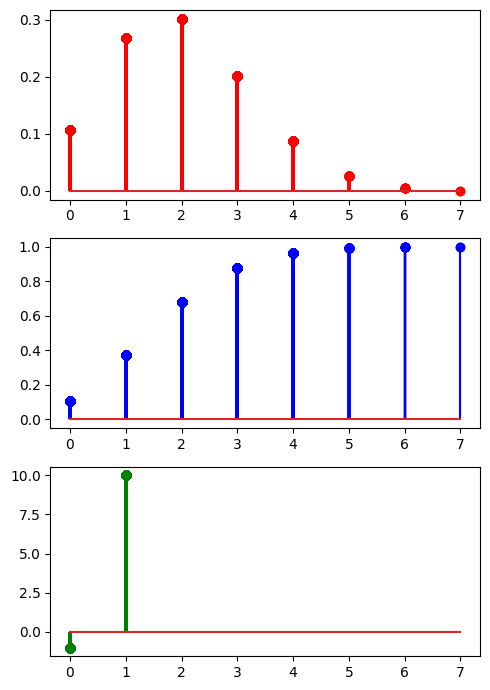

In [3]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Ejercicio 1

Escriba las funciones anteriores pero para distribuciones normales y uniformes.

In [4]:
from scipy.stats import norm

# dnorm: Densidad (la altura de la campana en un punto x)
def dnorm(x, mean=0, sd=1):
    return norm.pdf(x, loc=mean, scale=sd)

# pnorm: Acumulado (probabilidad de ser menor o igual a q)
def pnorm(q, mean=0, sd=1):
    return norm.cdf(q, loc=mean, scale=sd)

# qnorm: Cuantil (¿qué valor corta el p% de los datos?)
def qnorm(p, mean=0, sd=1):
    return norm.ppf(p, loc=mean, scale=sd)

# rnorm: Generar n números aleatorios que sigan esta campana
def rnorm(n, mean=0, sd=1):
    return norm.rvs(loc=mean, scale=sd, size=n)

In [5]:
from scipy.stats import uniform

# dunit: Densidad (siempre es constante entre el rango)
def dunif(x, min=0, max=1):
    # scale es la distancia entre el max y el min
    return uniform.pdf(x, loc=min, scale=max - min)

# punif: Probabilidad acumulada
def punif(q, min=0, max=1):
    return uniform.cdf(q, loc=min, scale=max - min)

# qunif: Cuantil
def qunif(p, min=0, max=1):
    return uniform.ppf(p, loc=min, scale=max - min)

# runif: Generar n números aleatorios entre el rango
def runif(n, min=0, max=1):
    return uniform.rvs(loc=min, scale=max - min, size=n)

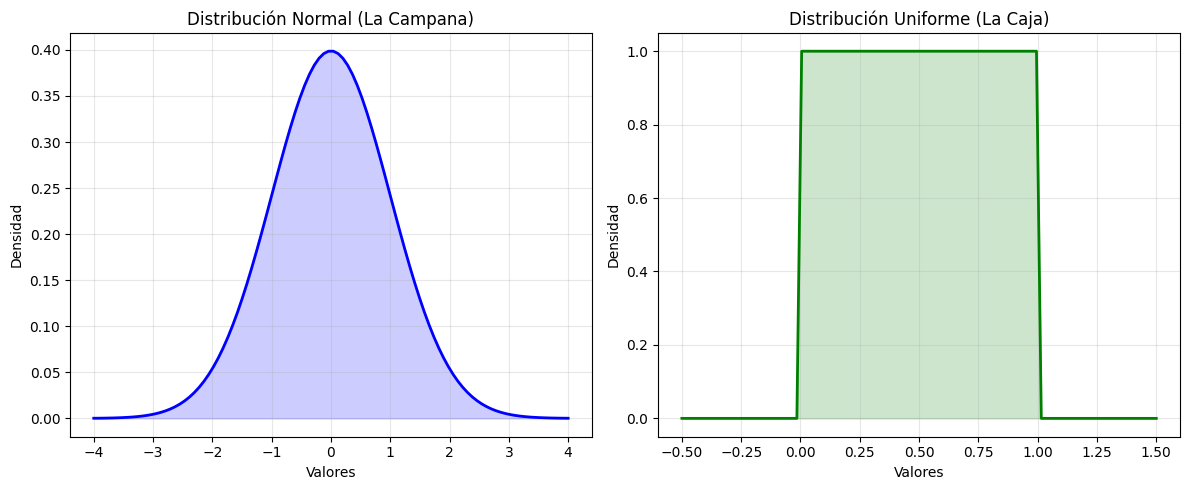

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform

# Configuramos el lienzo para dos gráficas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# --- 1. GRÁFICA DE LA DISTRIBUCIÓN NORMAL ---
# Creamos un rango de datos de -4 a 4 para ver la campana completa
x_norm = np.linspace(-4, 4, 100)
y_norm = dnorm(x_norm, mean=0, sd=1) # Usamos tu función dnorm

ax1.plot(x_norm, y_norm, color='blue', lw=2)
ax1.fill_between(x_norm, y_norm, color='blue', alpha=0.2) # Rellenamos color
ax1.set_title('Distribución Normal (La Campana)')
ax1.set_xlabel('Valores')
ax1.set_ylabel('Densidad')
ax1.grid(True, alpha=0.3)

# --- 2. GRÁFICA DE LA DISTRIBUCIÓN UNIFORME ---
# Rango un poco más ancho que el [0, 1] para ver dónde empieza y termina
x_unif = np.linspace(-0.5, 1.5, 100)
y_unif = [dunif(val, min=0, max=1) for val in x_unif] # Usamos tu función dunif

ax2.plot(x_unif, y_unif, color='green', lw=2)
ax2.fill_between(x_unif, y_unif, color='green', alpha=0.2)
ax2.set_title('Distribución Uniforme (La Caja)')
ax2.set_xlabel('Valores')
ax2.set_ylabel('Densidad')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()